In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## New original CSVs with 22 classes

In [18]:
vindr_combined_df = pd.read_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/rsna_vindr_cnet_csv/train.csv")
vindr_combined_df.head()

,image_id,level_1,x_min,y_min,x_max,y_max,area,path,class_name,class_id
0,000434271f63a053c4128a0ba6352c7f,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
1,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/RSNA-Pneunomia-Detection-PT/st...,No Finding,14
2,00053190460d56c53cc3e57321387478,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
3,0005e8e3701dfb1dd93d53e2ff537b6e,0,155.333333,94.5,199.5,149.333333,2550.138889,/share/nvmedata/vinbigdata-chest-xray-resized-...,Lung Opacity,7
4,0006e0a85696f6bb578e84fafa9a5607,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14


In [2]:
vindr_train_df = pd.read_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/new_csv/train.csv")
# vindr_test_df = pd.read_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/new_csv/test.csv")
vindr_val_df = pd.read_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/new_csv/val.csv")

In [3]:
# vindr_original_df = 

In [5]:

vindr_combined_df = pd.read_csv('/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/original_csv/train.csv')
# vindr_combined_df = pd.concat([vindr_train_df, vindr_test_df, vindr_val_df])
# vindr_combined_df = pd.concat([vindr_train_df, vindr_val_df])
# vindr_combined_df = pd.read_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/archived/vindr_rsna_df.csv")

In [19]:
vindr_combined_df['image_id'].nunique()

40509

In [8]:
# original_csv_dir = "/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/original_csv"
# vindr_combined_df = pd.read_csv(os.path.join(original_csv_dir, "train.csv"))
# vindr_combined_df['class_name'].replace({'No finding': 'No Finding'}, inplace=True)
# # vindr_val_df = pd.read_csv(os.path.join(original_csv_dir, "test.csv"))
# # vindr_val_df['class_name'].replace({'No finding': 'No Finding'}, inplace=True)

In [20]:
mimic_df = pd.read_csv("/home/aneeshashmi/generative/vindr_gen/pre_processed_csv/mimic/mimic_pt.csv")
mimic_cls = [i.lower() for i in mimic_df.columns[13:-2].tolist()]

vindr_cls = [i.lower() for i in vindr_combined_df['class_name'].unique().tolist()]

common_classes = list(set(mimic_cls).intersection(set(vindr_cls)))
len(common_classes)
print(common_classes)

['cardiomegaly', 'atelectasis', 'lung opacity', 'pneumonia', 'pleural effusion', 'no finding', 'pneumothorax', 'consolidation']


In [21]:
vindr_combined_df = vindr_combined_df[vindr_combined_df['class_name'].str.lower().isin(common_classes)]
vindr_combined_df.shape

(45451, 10)

In [22]:
vindr_combined_df.head()

,image_id,level_1,x_min,y_min,x_max,y_max,area,path,class_name,class_id
0,000434271f63a053c4128a0ba6352c7f,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
1,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/RSNA-Pneunomia-Detection-PT/st...,No Finding,14
2,00053190460d56c53cc3e57321387478,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
3,0005e8e3701dfb1dd93d53e2ff537b6e,0,155.333333,94.5,199.5,149.333333,2550.138889,/share/nvmedata/vinbigdata-chest-xray-resized-...,Lung Opacity,7
4,0006e0a85696f6bb578e84fafa9a5607,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14


In [27]:
# vindr_combined_df_14 = vindr_combined_df[vindr_combined_df['class_id'] == 14]

import json
with open('./vindr_h_w.json') as f:
    vindr_h_w = json.load(f)
vindr_14_imgs = vindr_combined_df['image_id'].unique()

not_found = []
for i in vindr_combined_df:
    if i not in vindr_h_w.keys():
        not_found.append(i)
print(len(not_found), len(vindr_combined_df))

10 45451


In [74]:
# Split df into train and val

val_imgs = [i[:-3] for i in os.listdir("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/val") if i.endswith(".pt")]
val_imgs = [i for i in val_imgs if "seg" not in i]

test_imgs = [i[:-3] for i in os.listdir("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/test") if i.endswith(".pt")]
test_imgs = [i for i in test_imgs if "seg" not in i]

train_imgs = [i[:-3] for i in os.listdir("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/train") if i.endswith(".pt")]
train_imgs = [i for i in train_imgs if "seg" not in i]

len(val_imgs), len(test_imgs), len(train_imgs)

(1000, 1000, 12999)

In [75]:
vindr_train_df = vindr_combined_df[vindr_combined_df['image_id'].isin(train_imgs)]
vindr_train_df['path'] = vindr_train_df['image_id'].apply(lambda x: os.path.join("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/train", x + ".pt"))

vindr_val_df = vindr_combined_df[vindr_combined_df['image_id'].isin(test_imgs)]
vindr_val_df['path'] = vindr_val_df['image_id'].apply(lambda x: os.path.join("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/test", x + ".pt"))

vindr_test_df = vindr_combined_df[vindr_combined_df['image_id'].isin(val_imgs)]
vindr_test_df['path'] = vindr_test_df['image_id'].apply(lambda x: os.path.join("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/val", x + ".pt"))

vindr_train_df = pd.concat([vindr_train_df, vindr_test_df])

/tmp/ipykernel_269084/1926156825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vindr_train_df['path'] = vindr_train_df['image_id'].apply(lambda x: os.path.join("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/train", x + ".pt"))
/tmp/ipykernel_269084/1926156825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vindr_val_df['path'] = vindr_val_df['image_id'].apply(lambda x: os.path.join("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/test", x + ".pt"))
/tmp/ipykernel_269084/1926156

In [76]:
# load image and get the original image height and width

In [77]:
# get img_size etc from the original csv

# /share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/archived
# vindr_train_df = pd.read_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/new_csv/train.csv")
# vindr_val_df = pd.read_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/new_csv/val.csv")
# vindr_prev_test_df = pd.read_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/rsna_vindr_csv/test.csv")

# vindr_train_df.head()


In [29]:
image_h_w = {}
def get_height_width(row):
    if row['class_id'] == 14:
        return row
    if row['image_id'] not in image_h_w:
        image_h_w[row['image_id']] = (row['img_height'], row['img_width'])
    return row

vindr_combined_df.apply(get_height_width, axis=1);

import numpy as np
print([np.isnan(i[0]) for i in image_h_w.values()].count(True), len(image_h_w))
dropped_imgs = [k for k, v in image_h_w.items() if np.isnan(v[0])]
# vindr_train_df.drop(vindr_train_df[vindr_train_df['image_id'].isin(dropped_imgs)].index, inplace=True)

In [85]:
import json

if os.path.isfile("./vindr_h_w.json"):
    print(f'Loading from json')
    print(len(image_h_w))
    with open("./vindr_h_w.json", "r") as f:
        image_h_w.update(json.load(f))
    print(len(image_h_w))

Loading from json
9531
9531


In [80]:
with open("./vindr_h_w.json", "w") as f:
    json.dump(image_h_w, f)

In [81]:
# vindr_prev_combined_df = vindr_prev_combined_df[['image_id', ""]]
img_id = "9a5094b2563a1ef3ff50dc5c7ff71345"
vindr_train_df[vindr_train_df['image_id'] == img_id]


,Unnamed: 0,index,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,...,img_width,x_min_orig,y_min_orig,x_max_orig,y_max_orig,area,path,bbox_width,bbox_height,class_name_prev
2,2,2.0,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,170.092308,301.369863,406.892308,401.315068,...,2080.0,691.0,1375.0,1653.0,1831.0,23667.024658,/share/nvmedata/vinbigdata-chest-xray-resized-...,NaN,NaN,NaN
3539,3539,5517.0,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural effusion,10,R9,440.369231,378.958904,461.538462,436.602740,...,2080.0,1789.0,1729.0,1875.0,1992.0,1220.275659,/share/nvmedata/vinbigdata-chest-xray-resized-...,NaN,NaN,NaN
16688,16688,26165.0,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R9,170.338462,301.369863,407.876923,394.301370,...,2080.0,692.0,1375.0,1657.0,1799.0,22074.807165,/share/nvmedata/vinbigdata-chest-xray-resized-...,NaN,NaN,NaN
27216,27216,42709.0,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R8,169.600000,287.780822,410.092308,386.410959,...,2080.0,689.0,1313.0,1666.0,1763.0,23719.789252,/share/nvmedata/vinbigdata-chest-xray-resized-...,NaN,NaN,NaN


<Axes: ylabel='class_name'>

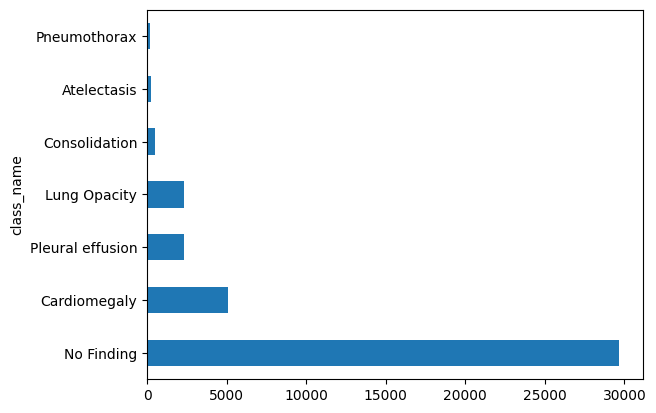

In [59]:
vindr_train_df['class_name'].value_counts().plot(kind='barh')

<Axes: ylabel='class_name'>

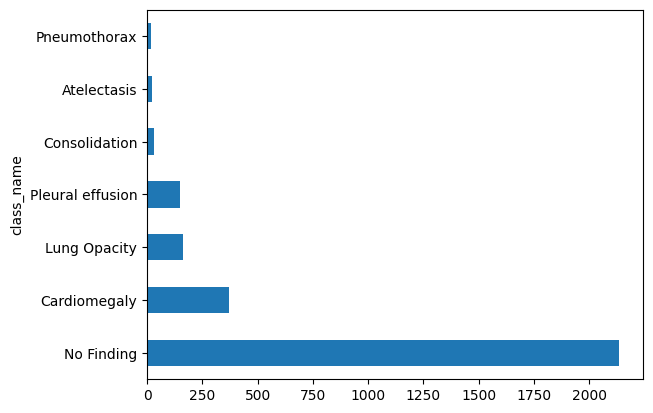

In [60]:
vindr_val_df['class_name'].value_counts().plot(kind='barh')

In [61]:
vindr_train_df['image_id'].nunique(), vindr_val_df['image_id'].nunique()

(13180, 945)

In [403]:
# def get_path(img_id):
#     if img_id in val_imgs:
#         return f"/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/val/{img_id}.pt"
#     elif img_id in test_imgs:
#         return f"/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/test/{img_id}.pt"
#     elif img_id in train_imgs:
#         return f"/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/train/{img_id}.pt"
#     else:
#         return None
# # 
# # vindr_combined_df['path'] = vindr_combined_df['image_id'].apply(get_path)

In [404]:
# all_imgs = vindr_combined_df['path'].tolist()

# for img_path in tqdm(all_imgs):
#     if os.path.exists(img_path) is False:
#         print(img_path)

In [405]:
# vindr_train_df = vindr_combined_df[vindr_combined_df['image_id'].isin(train_imgs+val_imgs)]
# vindr_val_df = vindr_combined_df[vindr_combined_df['image_id'].isin(test_imgs)]

In [406]:
vindr_train_df.shape, vindr_val_df.shape

((41359, 18), (1000, 15))

In [407]:
# # check if any img_id has more than one labels
# img_id_counts = vindr_prev_combined_df['image_id'].value_counts().to_dict()
# gt_1 = [k for k,v in img_id_counts.items() if v > 1]
# print("Number of images with more than one labels: ", len(gt_1))
# vindr_prev_combined_df[vindr_prev_combined_df['image_id'] == gt_1[44]]['class_name'].unique()

In [408]:
# len([i for i in os.listdir("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/train") if i.endswith(".pt")]), len([i for i in os.listdir("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/test") if i.endswith(".pt")]), len([i for i in os.listdir("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/val") if i.endswith(".pt")])


In [409]:
# vindr_train_df = vindr_train_df[vindr_train_df['class_name'].str.lower().isin(common_classes)]
# vindr_val_df = vindr_val_df[vindr_val_df['class_name'].str.lower().isin(common_classes)]

In [410]:
# imgs = vindr_train_df['image_id'].unique().tolist()
# dir_path = '/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/train'
# from tqdm import tqdm

# not_found = []
# for img in tqdm(imgs):
#     if not os.path.exists(os.path.join(dir_path, img+'.pt')):
#         not_found.append(img)
#         # break


In [411]:
# prev_imgs = vindr_prev_train_csv['image_id'].unique().tolist()

# not_found = []
# for img in tqdm(prev_imgs):
#     if not os.path.exists(os.path.join(dir_path, img+'.pt')):
#         not_found.append(img)
#         # break

In [412]:
# vindr_train_df = pd.read_csv(os.path.join(vindr_csv_path, "train.csv"))
# vindr_val_df = pd.read_csv(os.path.join(vindr_csv_path, "val.csv"))

In [62]:
len(vindr_train_df['image_id'].unique()), len(vindr_train_df), len(vindr_val_df['image_id'].unique()), len(vindr_val_df)


(13180, 40375, 945, 2890)

In [63]:
# # add path in vindr_train_df
# from tqdm import tqdm
# vindr_train_imgs = vindr_train_df['image_id'].unique().tolist()
# train_imgs_dir = os.listdir("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/train")
# test_imgs_dir = os.listdir("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/test")


# def get_path(row):
#     if row['image_id']+".pt" in train_imgs_dir:
#         return os.path.join("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/train", row['image_id']+".pt")
#     else:
#         return os.path.join("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/test", row['image_id']+".pt")

# vindr_train_df['path'] = vindr_train_df.apply(get_path, axis=1)

# vindr_train_df.to_csv(os.path.join(vindr_csv_path, "train.csv"), index=False)

In [64]:
rsna_csv_path = "/share/nvmedata/RSNA-Pneunomia-Detection-PT"

rsna_train_df = pd.read_csv(os.path.join(rsna_csv_path, "rsna_train.csv"))
rsna_val_df = pd.read_csv(os.path.join(rsna_csv_path, "rsna_val.csv"))
rsna_test_df = pd.read_csv(os.path.join(rsna_csv_path, "rsna_test.csv"))

In [65]:
# rsna_train_df['path'] = rsna_train_df.apply(lambda row: row['path'].replace("/share/nvmedata/RSNA-Pneunomia-Detection-PT/stage_2_train_pt/", '/share/nvmedata/RSNA-Pneunomia-Detection-PT/'), axis=1)
# rsna_val_df['path'] = rsna_val_df.apply(lambda row: row['path'].replace("/share/nvmedata/RSNA-Pneunomia-Detection-PT/stage_2_train_pt/", '/share/nvmedata/RSNA-Pneunomia-Detection-PT/'), axis=1)
# rsna_test_df['path'] = rsna_test_df.apply(lambda row: row['path'].replace("/share/nvmedata/RSNA-Pneunomia-Detection-PT/stage_2_train_pt/", '/share/nvmedata/RSNA-Pneunomia-Detection-PT/'), axis=1)

In [66]:
rsna_train_df.columns

Index(['image_id', 'path', 'png_path', 'x_min', 'y_min', 'x_max', 'y_max',
       'area', 'class', 'class_id', 'class_name'],
      dtype='object')

In [67]:
rsna_train_test_df = pd.concat([rsna_train_df, rsna_test_df])

In [68]:
rsna_train_test_df.shape, rsna_val_df.shape, rsna_test_df.shape, rsna_train_df.shape

((29881, 11), (346, 11), (340, 11), (29541, 11))

In [69]:
rsna_train_test_df.columns

Index(['image_id', 'path', 'png_path', 'x_min', 'y_min', 'x_max', 'y_max',
       'area', 'class', 'class_id', 'class_name'],
      dtype='object')

In [70]:
rsna_train_test_df['class_id'].unique()

array([14, 15])

In [72]:
# vindr_train_df[['image_id', 'path', 'x_min', 'y_min', 'x_max', 'y_max',
#        'area', 'class_id', 'class_name']]

In [423]:
# combined rsna_train_df and vindr_train_df
cols = ['image_id', 'path', 'x_min', 'y_min', 'x_max', 'y_max', 'area', 'class_id', 'class_name']
combined_train_df = pd.concat([rsna_train_test_df[cols], vindr_train_df[cols]])
combined_val_df = pd.concat([rsna_val_df[cols], vindr_val_df[cols]])

<Axes: xlabel='class_name'>

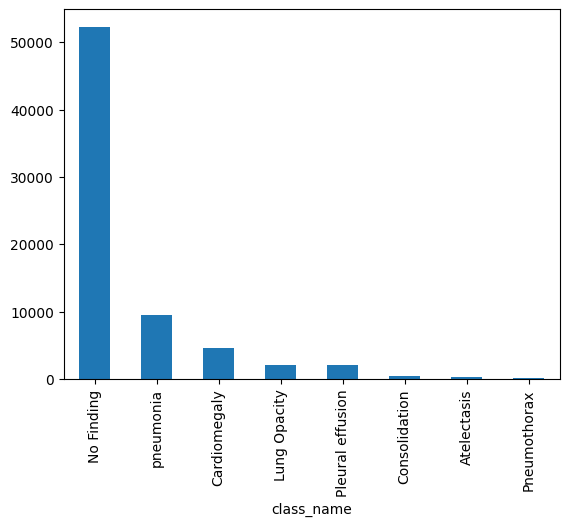

In [424]:
combined_train_df['class_name'].replace("No finding", "No Finding", inplace=True)
combined_train_df['class_name'].value_counts().plot(kind='bar')



In [425]:
combined_val_df['class_id'].unique()

array([14, 15,  0,  3, 11,  8, 13])

<Axes: xlabel='class_name'>

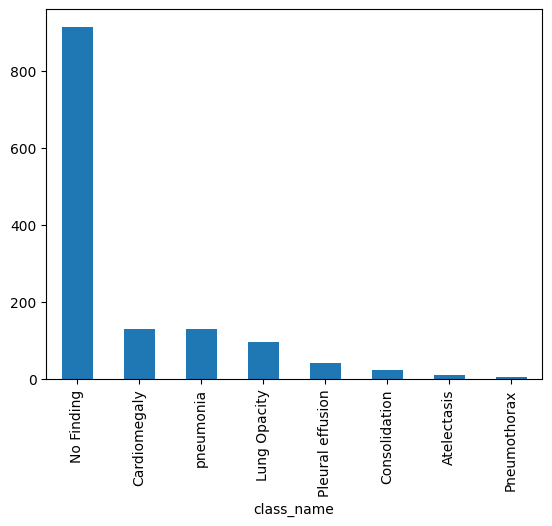

In [426]:

combined_val_df['class_name'].replace("No finding", "No Finding", inplace=True)
combined_val_df['class_name'].value_counts().plot(kind='bar')

In [427]:
# combined_train_df.to_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/rsna_vindr_cnet_csv/train.csv", index=False)
# combined_val_df.to_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/rsna_vindr_cnet_csv/val.csv", index=False)

In [428]:
import pandas as pd
import numpy as np

def non_max_suppression(boxes, overlap_threshold=0.2):
    if len(boxes) == 0:
        return []

    # Assuming boxes is a NumPy array where each row is [x_min, y_min, x_max, y_max]
    pick = []
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    indices = np.argsort(y2)  # Sort by the bottom y-coordinate of the bounding boxes

    while len(indices) > 0:
        last = len(indices) - 1
        i = indices[last]
        pick.append(i)

        xx1 = np.maximum(x1[i], x1[indices[:last]])
        yy1 = np.maximum(y1[i], y1[indices[:last]])
        xx2 = np.minimum(x2[i], x2[indices[:last]])
        yy2 = np.minimum(y2[i], y2[indices[:last]])

        width = np.maximum(0, xx2 - xx1 + 1)
        height = np.maximum(0, yy2 - yy1 + 1)

        overlap = (width * height) / area[indices[:last]]

        indices = np.delete(
            indices,
            np.concatenate(
                (
                    [last],
                    np.where(overlap > overlap_threshold)[0]
                )
            )
        )

    return boxes[pick]


In [429]:

# # Load CSV data
# # Group data by 'image_id'
# grouped_data = combined_train_df.groupby('image_id')

# # Apply NMS for each group
# nms_results = []
# for group_name, group_data in grouped_data:
#     bounding_boxes = group_data[['x_min', 'y_min', 'x_max', 'y_max']].values
#     result = non_max_suppression(bounding_boxes)
#     nms_results.append(result)

# # Combine the results back into a single DataFrame
# train_nms_df = pd.concat([pd.DataFrame(result, columns=['x_min', 'y_min', 'x_max', 'y_max']) for result in nms_results], keys=grouped_data.groups.keys())



# # Load CSV data
# # combined_train_df = combined_train_df
# # Group data by 'image_id'
# grouped_data = combined_val_df.groupby('image_id')

# # Apply NMS for each group
# nms_results = []
# for group_name, group_data in grouped_data:
#     bounding_boxes = group_data[['x_min', 'y_min', 'x_max', 'y_max']].values
#     result = non_max_suppression(bounding_boxes)
#     nms_results.append(result)

# # Combine the results back into a single DataFrame
# val_nms_df = pd.concat([pd.DataFrame(result, columns=['x_min', 'y_min', 'x_max', 'y_max']) for result in nms_results], keys=grouped_data.groups.keys())


In [430]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# # Load CSV data
# df = combined_train_df
# # Select relevant columns for grouping and NMS
# group_cols = ['image_id', 'x_min', 'y_min', 'x_max', 'y_max', 'area', 'path', 'class_name', 'class_id']
# grouped_data = df[group_cols].groupby('image_id')

# # Apply NMS for each group
# nms_results = []
# for group_name, group_data in grouped_data:
#     bounding_boxes = group_data[['x_min', 'y_min', 'x_max', 'y_max']].values
#     result = non_max_suppression(bounding_boxes)
#     nms_results.append(result)

# # Combine the results back into a single DataFrame
# train_nms_df = pd.concat([pd.DataFrame(result, columns=['x_min', 'y_min', 'x_max', 'y_max']) for result in nms_results], keys=grouped_data.groups.keys())

# # Reset index and merge with original columns
# train_nms_df = train_nms_df.reset_index()
# train_nms_df.rename(columns={'level_0': 'image_id'}, inplace=True)
# train_result_df = pd.merge(train_nms_df, df[['image_id', 'area', 'path', 'class_name', 'class_id']], on='image_id').drop_duplicates(subset=['image_id','x_min', 'y_min', 'x_max', 'y_max'])

# # .drop_duplicates(subset=['x_min', 'y_min', 'x_max', 'y_max'])


df = combined_train_df
# Select relevant columns for grouping and NMS
group_cols = ['image_id', 'x_min', 'y_min', 'x_max', 'y_max', 'area', 'path', 'class_name', 'class_id']
grouped_data = df[group_cols].groupby(['image_id', 'class_name'])

# Apply NMS for each group
nms_results = []
for group_name, group_data in grouped_data:
    bounding_boxes = group_data[['x_min', 'y_min', 'x_max', 'y_max']].values
    result = non_max_suppression(bounding_boxes)
    nms_results.append(result)

# Combine the results back into a single DataFrame
train_nms_df = pd.concat([pd.DataFrame(result, columns=['x_min', 'y_min', 'x_max', 'y_max']) for result in nms_results], keys=grouped_data.groups.keys())

# Reset index and merge with original columns
train_nms_df = train_nms_df.reset_index()
train_nms_df.rename(columns={'level_0': 'image_id'}, inplace=True)

# Merge with original columns including 'class_name'
train_result_df = pd.merge(train_nms_df, df[['image_id', 'area', 'path', 'class_name', 'class_id']], on=['image_id']).drop_duplicates(subset=['image_id', 'class_name', 'x_min', 'y_min', 'x_max', 'y_max'])

# Save the result to a new CSV file
# train_result_df.to_csv("result.csv", index=False)  # Replace "result.csv" with your desired output file path

In [432]:



import pandas as pd
import numpy as np

# Load CSV data
df = combined_val_df
# # Select relevant columns for grouping and NMS
# group_cols = ['image_id', 'x_min', 'y_min', 'x_max', 'y_max', 'area', 'path', 'class_name', 'class_id']
# grouped_data = df[group_cols].groupby('image_id')

# # Apply NMS for each group
# nms_results = []
# for group_name, group_data in grouped_data:
#     bounding_boxes = group_data[['x_min', 'y_min', 'x_max', 'y_max']].values
#     result = non_max_suppression(bounding_boxes)
#     nms_results.append(result)

# # Combine the results back into a single DataFrame
# val_nms_df = pd.concat([pd.DataFrame(result, columns=['x_min', 'y_min', 'x_max', 'y_max']) for result in nms_results], keys=grouped_data.groups.keys())

# # Reset index and merge with original columns
# val_nms_df = val_nms_df.reset_index()
# val_nms_df.rename(columns={'level_0': 'image_id'}, inplace=True)
# val_result_df = pd.merge(val_nms_df, df[['image_id', 'area', 'path', 'class_name', 'class_id']], on='image_id').drop_duplicates(subset=['image_id','x_min', 'y_min', 'x_max', 'y_max'])



group_cols = ['image_id', 'x_min', 'y_min', 'x_max', 'y_max', 'area', 'path', 'class_name', 'class_id']
grouped_data = df[group_cols].groupby(['image_id', 'class_name'])

# Apply NMS for each group
nms_results = []
for group_name, group_data in grouped_data:
    bounding_boxes = group_data[['x_min', 'y_min', 'x_max', 'y_max']].values
    result = non_max_suppression(bounding_boxes)
    nms_results.append(result)

# Combine the results back into a single DataFrame
val_nms_df = pd.concat([pd.DataFrame(result, columns=['x_min', 'y_min', 'x_max', 'y_max']) for result in nms_results], keys=grouped_data.groups.keys())

# Reset index and merge with original columns
val_nms_df = val_nms_df.reset_index()
val_nms_df.rename(columns={'level_0': 'image_id'}, inplace=True)

# Merge with original columns including 'class_name'
val_result_df = pd.merge(val_nms_df, df[['image_id', 'area', 'path', 'class_name', 'class_id']], on=['image_id']).drop_duplicates(subset=['image_id', 'class_name', 'x_min', 'y_min', 'x_max', 'y_max'])

# Save the result to a new CSV file
val_result_df.to_csv("result.csv", index=False)  # Replace "result.csv" with your desired output file path

In [436]:
# vindr_prev_combined_df = vindr_prev_combined_df[['image_id', ""]]
img_id = "9a5094b2563a1ef3ff50dc5c7ff71345"
train_result_df[train_result_df['image_id'] == img_id]


,image_id,level_1,level_2,x_min,y_min,x_max,y_max,area,path,class_name,class_id
92472,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,0,170.092308,301.369863,406.892308,401.315068,23667.024658,/share/nvmedata/vinbigdata-chest-xray-resized-...,Cardiomegaly,3
92473,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,0,170.092308,301.369863,406.892308,401.315068,1220.275659,/share/nvmedata/vinbigdata-chest-xray-resized-...,Pleural effusion,10
92476,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural effusion,0,440.369231,378.958904,461.538462,436.602740,23667.024658,/share/nvmedata/vinbigdata-chest-xray-resized-...,Cardiomegaly,3
92477,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural effusion,0,440.369231,378.958904,461.538462,436.602740,1220.275659,/share/nvmedata/vinbigdata-chest-xray-resized-...,Pleural effusion,10


In [433]:
val_result_df.head()

,image_id,level_1,level_2,x_min,y_min,x_max,y_max,area,path,class_name,class_id
0,0010f549-b242-4e94-87a8-57d79de215fc,No Finding,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/RSNA-Pneunomia-Detection-PT/st...,No Finding,14
1,00575e3846ebd05a909d97ba59c53d30,No Finding,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
2,005be26a68485912e007a3703f43d60a,No Finding,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
3,007c1195aab852cff5c20736be26a1ae,No Finding,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
4,00ad02393a5d0bd1e0dcf3196433499f,No Finding,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14


In [80]:
train_result_df.head()

,image_id,level_1,x_min,y_min,x_max,y_max,area,path,class_name,class_id
0,000434271f63a053c4128a0ba6352c7f,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
9,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/RSNA-Pneunomia-Detection-PT/00...,No Finding,14
10,00053190460d56c53cc3e57321387478,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
19,0005e8e3701dfb1dd93d53e2ff537b6e,0,155.333333,94.5,199.5,149.333333,2550.138889,/share/nvmedata/vinbigdata-chest-xray-resized-...,Lung Opacity,7
22,0006e0a85696f6bb578e84fafa9a5607,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14


In [81]:
train_result_df['image_id'].nunique(), len(train_result_df), combined_train_df['image_id'].nunique(), len(combined_train_df)

(40509, 45451, 40509, 73146)

In [82]:
a['image_id'].nunique(), len(a), combined_train_df['image_id'].nunique(), len(combined_train_df)

(40509, 45451, 40509, 73146)

In [83]:
len(val_result_df['image_id'].unique()), len(val_result_df), len(combined_val_df['image_id'].unique()), len(combined_val_df)

(1100, 1321, 1100, 1346)

In [148]:
from tqdm import tqdm
out = []
for i in tqdm(train_result_df['path']):
    if "RSNA" not in i:
        if not os.path.exists(i):
            out.append(i)

100%|██████████| 45451/45451 [00:00<00:00, 809185.96it/s]


In [149]:
len(out)

0

In [150]:
val_result_df['path'].tolist()[3]

'/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/val/007c1195aab852cff5c20736be26a1ae.pt'

In [151]:
dup = []
for i in out:
    if i in val_result_df['path'].tolist():
        dup.append(i)

In [152]:
in_val = []
for i in out:
    if os.path.exists(i.replace("test", "val")):
        in_val.append(i) 

In [147]:
def fix_path(path):
    if "RSNA" not in path:
        if not os.path.exists(path):
            return path.replace("test", "val")
        else:
            return path
    else:
        return path
train_result_df['path'] = train_result_df['path'].apply(fix_path)

val_result_df['path'] = val_result_df['path'].apply(fix_path)

In [153]:
train_result_df.to_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/rsna_vindr_cnet_csv/train.csv", index=False)
val_result_df.to_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/rsna_vindr_cnet_csv/val.csv", index=False)

In [107]:
cls_ = 'Cardiomegaly'
idx= train_result_df[train_result_df['class_name'] == cls_]['image_id'].unique()[-4]

train_result_df[train_result_df['image_id'] == idx]

,image_id,level_1,x_min,y_min,x_max,y_max,area,path,class_name,class_id
158677,ff6b2b10b8f2350ab09d8690c9c83154,0,154.854902,298.085603,370.94902,348.140078,10816.477546,/share/nvmedata/vinbigdata-chest-xray-resized-...,Cardiomegaly,3


In [108]:
train_nms_df[train_nms_df['image_id'] == idx]

,image_id,level_1,x_min,y_min,x_max,y_max
67866,ff6b2b10b8f2350ab09d8690c9c83154,0,154.854902,298.085603,370.94902,348.140078


In [65]:
combined_train_df['image_id'].nunique(), train_nms_df['image_id'].nunique(), train_result_df['image_id'].nunique()

(40509, 40509, 8881)

In [61]:
combined_val_df['image_id'].unique()

array(['03da08b4-9f24-4822-8b2b-4abf27e3c9a8',
       '06697be9-b1ab-444c-af0d-fd11a053f2b3',
       '074f91b5-e915-4b6f-bdf0-af1ee55ebd9b', ...,
       'cc398f956e6eb52101027360302a66f8',
       '3d99c31c358e664d2b39d312dbabcd33',
       'f27211729f43d69b1162fc2d5f1881a1'], dtype=object)

In [87]:

idx= combined_val_df['image_id'].unique()[-1]

val_result_df[val_result_df['image_id'] == idx]

,image_id,level_1,x_min,y_min,x_max,y_max,area,path,class_name,class_id
2132,f27211729f43d69b1162fc2d5f1881a1,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14


In [117]:
a = '00575e3846ebd05a909d97ba59c53d30.pt'

In [121]:
a in  os.listdir('/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/val')

True

## Fresh

In [31]:
vindr_combined_df = pd.read_csv("/share/nvmedata/vinbigdata-chest-xray-resized-pt-512x512/rsna_vindr_cnet_csv/train.csv")
vindr_combined_df.head()

,image_id,level_1,x_min,y_min,x_max,y_max,area,path,class_name,class_id
0,000434271f63a053c4128a0ba6352c7f,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
1,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/RSNA-Pneunomia-Detection-PT/st...,No Finding,14
2,00053190460d56c53cc3e57321387478,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14
3,0005e8e3701dfb1dd93d53e2ff537b6e,0,155.333333,94.5,199.5,149.333333,2550.138889,/share/nvmedata/vinbigdata-chest-xray-resized-...,Lung Opacity,7
4,0006e0a85696f6bb578e84fafa9a5607,0,NaN,NaN,NaN,NaN,NaN,/share/nvmedata/vinbigdata-chest-xray-resized-...,No Finding,14


In [32]:
# check if any image has more than one labels
vindr_combined_df.shape, vindr_combined_df['image_id'].nunique() 

((45451, 10), 40509)